In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df[0:2]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
from sklearn.utils import resample
df_majority=df[df.Class==0]
df_minority=df[df.Class==1]
df_minority_upsampled=resample(df_minority,n_samples=284315, random_state=123)
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

In [6]:
df1 = df_upsampled[['V17', 'V14', 'V12', 'V16', 'V4', 'V11', 'V10', 'V3']].copy()
df2 = df[['V17', 'V14', 'V12', 'V16', 'V4', 'V11', 'V10', 'V3']].copy()

In [7]:
y=df_upsampled.Class
x=df1
y_real=df.Class
x_real=df2
from sklearn import preprocessing
# x = preprocessing.normalize(x)
# x = preprocessing.scale(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [8]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=30)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [9]:
pred=dtc.predict(x_real)

In [10]:
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.metrics import accuracy_score
print("Accuracy= ",accuracy_score(pred,y_real))
print("Classification Report=\n",classification_report(y_real,pred))
tn, fp, fn, tp = confusion_matrix(y_real,pred).ravel()
print("TP=",tp)
print("FP=",fp)
print("FN=",fn)
print("TN=",tn)

('Accuracy= ', 0.99985955401377069)
('Classification Report=\n', '             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00    284315\n          1       0.92      1.00      0.96       492\n\navg / total       1.00      1.00      1.00    284807\n')
('TP=', 492)
('FP=', 40)
('FN=', 0)
('TN=', 284275)


In [11]:
precision_dt, recall_dt, _ = precision_recall_curve(y_real,pred)
FPR_dt,TPR_dt,_ = sk.metrics.roc_curve(y_real,pred)

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=30)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [13]:
pred_RFC= rfc.predict(x_real)

In [14]:
print("Accuracy= ",accuracy_score(pred_RFC,y_real))
print("Classification Report=\n",classification_report(y_real,pred_RFC))
tn, fp, fn, tp = confusion_matrix(y_real,pred_RFC).ravel()
print("TP=",tp)
print("FP=",fp)
print("FN=",fn)
print("TN=",tn)

('Accuracy= ', 0.99997191080275416)
('Classification Report=\n', '             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00    284315\n          1       0.98      1.00      0.99       492\n\navg / total       1.00      1.00      1.00    284807\n')
('TP=', 492)
('FP=', 8)
('FN=', 0)
('TN=', 284307)


In [15]:
precision_rf, recall_rf, _ = precision_recall_curve(y_real,pred_RFC)
FPR_rf,TPR_rf,_ = roc_curve(y_real,pred_RFC)

In [16]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(25,20,20,20,15),max_iter=1500, batch_size=1500)
mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size=1500, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25, 20, 20, 20, 15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [17]:
pred_MLP= mlp.predict(x_real)

In [18]:
print("MLP")
print("Accuracy= ",accuracy_score(pred_MLP,y_real))
print("Classification Report=\n",classification_report(y_real,pred_MLP))
tn, fp, fn, tp = confusion_matrix(y_real,pred_MLP).ravel()
print("TP=",tp)
print("FP=",fp)
print("FN=",fn)
print("TN=",tn)

MLP
('Accuracy= ', 0.99849722794734685)
('Classification Report=\n', '             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00    284315\n          1       0.53      1.00      0.70       492\n\navg / total       1.00      1.00      1.00    284807\n')
('TP=', 492)
('FP=', 428)
('FN=', 0)
('TN=', 283887)


In [19]:
precision_mlp, recall_mlp, _ = precision_recall_curve(y_real,pred_MLP)
FPR_mlp,TPR_mlp,_ = roc_curve(y_real,pred_MLP)

In [20]:
from sklearn import svm
svm_classifier = sk.svm.SVC()
svm_classifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
pred_SVM = svm_classifier.predict(x_real)

In [22]:
print("SVM")
print("Accuracy= ",accuracy_score(pred_SVM,y_real))
print("Classification Report=\n",classification_report(y_real,pred_SVM))
tn, fp, fn, tp = confusion_matrix(y_real,pred_SVM).ravel()
print("TP=",tp)
print("FP=",fp)
print("FN=",fn)
print("TN=",tn)

SVM
('Accuracy= ', 0.99238782754637356)
('Classification Report=\n', '             precision    recall  f1-score   support\n\n          0       1.00      0.99      1.00    284315\n          1       0.18      1.00      0.31       492\n\navg / total       1.00      0.99      0.99    284807\n')
('TP=', 491)
('FP=', 2167)
('FN=', 1)
('TN=', 282148)


In [29]:
precision_svm, recall_svm, _ = precision_recall_curve(y_real,pred_SVM)
FPR_svm,TPR_svm,_ = roc_curve(y_real,pred_SVM)

In [42]:
from sklearn.ensemble import BaggingClassifier
bagging_classifier = BaggingClassifier(max_features=8)
bagging_classifier.fit(x_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=8, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [43]:
pred_bagging = bagging_classifier.predict(x_real)

In [44]:
print("Bagging of decision tree")
print("Accuracy= ",accuracy_score(pred_bagging,y_real))
print("Classification Report=\n",classification_report(y_real,pred_bagging))
tn, fp, fn, tp = confusion_matrix(y_real,pred_bagging).ravel()
print("TP=",tp)
print("FP=",fp)
print("FN=",fn)
print("TN=",tn)

Bagging of decision tree
('Accuracy= ', 0.99984902056480351)
('Classification Report=\n', '             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00    284315\n          1       0.92      1.00      0.96       492\n\navg / total       1.00      1.00      1.00    284807\n')
('TP=', 492)
('FP=', 43)
('FN=', 0)
('TN=', 284272)


ROC curve


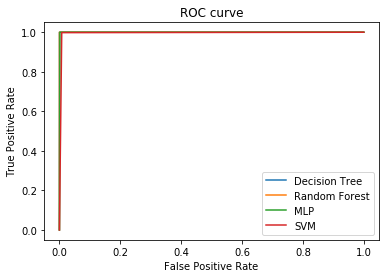

In [25]:
import matplotlib.pyplot as plt
print "ROC curve"
line_dt, = plt.plot(FPR_dt,TPR_dt,label='Decision Tree')
line_rf, = plt.plot(FPR_rf,TPR_rf,label='Random Forest')
line_mlp, = plt.plot(FPR_mlp,TPR_mlp,label='MLP')
line_svm, = plt.plot(FPR_svm,TPR_svm,label='SVM')
plt.legend(handles=[line_dt, line_rf,line_mlp, line_svm])
plt.title("ROC curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [26]:
print "Area under curve: DT,RF,MLP,SVM"
print auc(FPR_dt,TPR_dt),auc(FPR_rf,TPR_rf),auc(FPR_mlp,TPR_mlp),auc(FPR_svm,TPR_svm)

Area under curve: DT,RF,MLP,SVM
0.999929655488 0.999985931098 0.999247313719 0.995172825886


PR curve


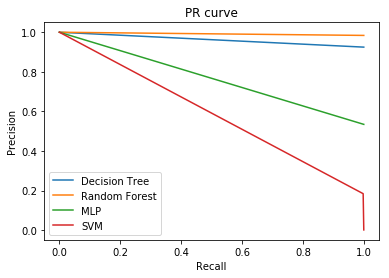

Area under the curve for Decision Tree: 


In [27]:
print "PR curve"
line_dt, = plt.plot(recall_dt,precision_dt,label='Decision Tree')
line_rf, = plt.plot(recall_rf,precision_rf,label='Random Forest')
line_mlp, = plt.plot(recall_mlp,precision_mlp,label='MLP')
line_svm, = plt.plot(recall_svm,precision_svm,label='SVM')
plt.legend(handles=[line_dt, line_rf,line_mlp, line_svm])
plt.title("PR curve")
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()
print "Area under the curve for Decision Tree: "

In [28]:
print "Area under curve: DT,RF,MLP,SVM"
print auc(recall_dt,precision_dt),auc(recall_rf,precision_rf),auc(recall_mlp,precision_mlp),auc(recall_svm,precision_svm)

Area under curve: DT,RF,MLP,SVM
0.962406015038 0.992 0.767391304348 0.591348174118


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=30)
dtc.fit(x_train,y_train)
scores = cross_val_score(dtc, x_test, y_test, cv=5)
print("Accuracy: %0.10f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.9992555208 (+/- 0.00)


In [14]:
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.metrics import accuracy_score
print("Accuracy= ",accuracy_score(pred,y_real))
print("Classification Report=\n",classification_report(y_real,pred))
tn, fp, fn, tp = confusion_matrix(y_real,pred).ravel()
print("TP=",tp)
print("FP=",fp)
print("FN=",fn)
print("TN=",tn)

array([ 0.99917932,  0.99958966,  0.99920863,  0.99915001,  0.99935516])